<h3 style = "font-size:60px; font-family:Garamond ; font-weight : normal; background-color: #f6f5f5 ; color : #fe346e; text-align: center; border-radius: 100px 100px;">Importing the libraries</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# For doing the PCA using sklearn
from sklearn.decomposition import PCA

# For doing the kmeans clustering in question 2
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

<h3 style = "font-size:60px; font-family:Garamond ; font-weight : normal; background-color: #f6f5f5 ; color : #fe346e; text-align: center; border-radius: 100px 100px;">Importing the Dataset</h3>

In [2]:
dataset = pd.read_csv("mnist.csv", header=None)

# for predictors we will ignore the first column
X = dataset.iloc[:, 1:].values

# taking the first column for target i.e the label
y = dataset.iloc[:, 0].values

<h3 style = "font-size:60px; font-family:Garamond ; font-weight : normal; background-color: #f6f5f5 ; color : #fe346e; text-align: center; border-radius: 100px 100px;">Question 1</h3>

<h3 style = "font-size:30px; font-family:Garamond ; font-weight : normal; background-color: #f6f5f5 ; color : #fe346e; text-align: center; border-radius: 100px 100px;">Calculating the PCA from scratch</h3>
<h6 style = "font-size:30px; font-family:Garamond ; font-weight : normal; background-color: #f6f5f5 ; color : #fe346e; text-align: center; border-radius: 100px 100px;">Reference: Used lectured slides + the code in matlab that was given + Hands on Machine Learning Book By Aurelien Geron Chapter 8</h6>

In [3]:
# PCA from scratch
class CustomPCA:
    def __init__(self, n_components=8):
        self.n_components = n_components
        self.X_centered = 0
        self.P_vectors = 0
        
    def fit(self, X):
        # Subtract Mean
        self.X_centered = X - X.mean(axis=0)
        
        # Calculate the covariance matrix
        X_cov = np.cov(self.X_centered.T)
        
        # calculate the eigenvectors and eigenvalues of the covariance matrix
        eigen_values, eigen_vectors = np.linalg.eig(X_cov)
        
        # Rank the eigen values according to eigen vectors
        # first find the indices of the eigenvalues in descending order
        eigen_idx_reversed = eigen_values.argsort()[::-1]
        
        # getting rows with top k i.e 10 eigen vectors
        self.P_vectors = eigen_vectors[:, eigen_idx_reversed[:self.n_components]]
    
    def transform(self):
        # Projecting Pvectors on X_centered. 
        # This one is taken from the book mentioned Chapter 8
        transformed_data = self.X_centered.dot(self.P_vectors)
        return transformed_data

In [4]:
pca_sc = CustomPCA(n_components=10)
pca_sc.fit(X)
X_transformed = pca_sc.transform()

In [5]:
transformed_cov = np.cov(X_transformed.T)

In [6]:
print("Covariance Matrix of the Transformed data")
print(transformed_cov.real)
print()
print("*****************")
print()
print("Sum of the covariance matrix for each dimension")
print(transformed_cov.sum(axis=0).real)
print()
print("Sum of the covariance matrix:")
print(transformed_cov.sum().real)

Covariance Matrix of the Transformed data
[[ 5.30558677e+00  2.52995380e-15  2.50152735e-15  1.60194874e-16
  -6.34857320e-16  4.72589684e-16 -7.55669721e-16  1.28629673e-15
  -4.97462826e-17  4.29653905e-16]
 [ 2.52995380e-15  3.87701635e+00  2.92081745e-15 -1.69433469e-15
   5.51946849e-16  1.30050996e-15  8.52793415e-17  8.90103127e-16
   1.68308256e-15 -1.82995254e-16]
 [ 2.50152735e-15  2.92081745e-15  3.28704664e+00 -1.42902119e-15
   3.05584307e-16 -1.20279405e-15 -7.74324577e-16  6.61211006e-16
  -7.84096168e-16  4.06853525e-16]
 [ 1.60194874e-16 -1.69433469e-15 -1.42902119e-15  2.91254096e+00
  -3.86718125e-16  4.57784243e-16 -5.40102496e-16  1.25638974e-15
   1.71091679e-15 -5.39214170e-16]
 [-6.34857320e-16  5.51946849e-16  3.05584307e-16 -3.86718125e-16
   2.48633206e+00 -2.04433533e-15  2.20304966e-16 -7.47822837e-16
  -1.04822524e-16  3.94416955e-16]
 [ 4.72589684e-16  1.30050996e-15 -1.20279405e-15  4.57784243e-16
  -2.04433533e-15  2.35358942e+00 -2.28418347e-15  4.7466

<h3 style = "font-size:30px; font-family:Garamond ; font-weight : normal; background-color: #f6f5f5 ; color : #fe346e; text-align: center; border-radius: 100px 100px;">Calculating the PCA using sklearn</h3>

In [7]:
# Fun fact about random state to have 42 number is it was taken from The Hitchhiker's Guide to the Galaxy
# The Hitchhiker's Guide
"""In this novel, a supercomputer called Deep Thought takes 
seven and a half million years to compute the answer to the 
ultimate question of Life, The Universe and Everything. 
The answer turns out to be 42"""
pca = PCA(n_components=10, random_state=42)

# fitting
pca.fit(X)
pca_transformed_data = pca.transform(X)

In [8]:
pca_transformed_cov = np.cov(pca_transformed_data.T)

In [9]:
print("Covariance Matrix of the Transformed data")
print(pca_transformed_cov)
print()
print("*****************")
print()
print("Sum of the covariance matrix for each dimension")
print(pca_transformed_cov.sum(axis=0))
print()
print("Sum of the covariance matrix:")
print(pca_transformed_cov.sum())

Covariance Matrix of the Transformed data
[[ 5.30558677e+00 -5.20334271e-14  2.64271204e-13 -1.30398313e-13
   4.48237694e-13  1.59227072e-12  1.21375280e-11  1.67928479e-11
   3.98693311e-11  3.41661596e-11]
 [-5.20334271e-14  3.87701635e+00 -1.95543161e-12  1.91417062e-12
  -4.29125173e-12 -8.96265833e-12 -5.85249273e-11 -8.30349598e-11
  -3.12213324e-10 -7.92842707e-11]
 [ 2.64271204e-13 -1.95543161e-12  3.28704664e+00 -9.70916259e-12
   2.64418524e-11  3.41062774e-11  2.24206677e-10  5.40415604e-10
   1.52962900e-09  1.39765187e-10]
 [-1.30398313e-13  1.91417062e-12 -9.70916259e-12  2.91254096e+00
  -2.53140672e-11 -3.50008185e-11 -1.95772269e-10 -3.55971159e-10
  -1.74718869e-09  1.52455134e-11]
 [ 4.48237694e-13 -4.29125173e-12  2.64418524e-11 -2.53140672e-11
   2.48633206e+00  1.00992289e-10  5.83192265e-10  5.61929321e-10
   3.69142476e-09 -5.60968297e-10]
 [ 1.59227072e-12 -8.96265833e-12  3.41062774e-11 -3.50008185e-11
   1.00992289e-10  2.35358942e+00  2.14222886e-09  1.2273

<h3 style = "font-size:60px; font-family:Garamond ; font-weight : normal; background-color: #f6f5f5 ; color : #fe346e; text-align: center; border-radius: 100px 100px;">Question 2</h3>

In [10]:
# initializing the KMeans object
kmeans = KMeans(n_clusters=10, random_state=42)
# traing on the dataset without applying PCA into 10 groups
kmeans.fit(X)

KMeans(n_clusters=10, random_state=42)

In [11]:
print("********10 centroid Points********")
print(kmeans.cluster_centers_)

********10 centroid Points********
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
pd.DataFrame(kmeans.cluster_centers_)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.542686e-03,4.373021e-03,2.115760e-03,1.819284e-03,1.233071e-03,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.252607e-19,-6.505213e-19,-1.355253e-19,-2.710505e-20,-8.131516e-20,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.168404e-19,-1.084202e-18,-1.355253e-19,8.131516e-20,-1.761829e-19,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.242637e-03,6.347669e-04,-1.355253e-19,8.131516e-20,-1.761829e-19,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.421011e-19,-8.673617e-19,-1.626303e-19,2.710505e-20,-1.219727e-19,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.168404e-19,-1.192622e-18,-1.355253e-19,-8.131516e-20,-2.168404e-19,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.252607e-19,-6.505213e-19,-1.355253e-19,-5.421011e-20,-9.486769e-20,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.421011e-19,-8.673617e-19,-1.355253e-19,8.131516e-20,-1.490778e-19,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-6.505213e-19,-9.757820e-19,-1.355253e-19,1.355253e-19,-1.761829e-19,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.589415e-19,-6.505213e-19,-8.131516e-20,5.421011e-20,-1.084202e-19,0.0,0.0,0.0,0.0,0.0


In [13]:
# Another way to print all the values inside kmeans.cluster_centers_
[print(cen) for cen in kmeans.cluster_centers_]

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  6.87285223e-04
  2.33811738e-03  3.17364059e-03  2.00795095e-03  2.45266491e-03
  6.94023314e-04  6.13166229e-04  1.50933226e-03  2.49309346e-04
  9.75781955e-19  4.33680869e-19  1.08420217e-19  2.71050543e-19
 -1.08420217e-19  2.98155597e-19  1.35525272e-19  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.71050543e-20 -6.77626

[None, None, None, None, None, None, None, None, None, None]

In [14]:
# Sums of all dimensions for each of these 10 centroid points
print("Sum of all dimensions of data for each of the ten centroid points")
print(kmeans.cluster_centers_.sum(axis=1))

Sum of all dimensions of data for each of the ten centroid points
[102.41511354  69.46601307 118.27974767  95.95323166 145.98075752
  66.1579225  126.64895456 119.7224778   94.49807723 112.20392926]


In [15]:
# Another way to print the sum of all dimensions for each of the 10 centroids
for c in kmeans.cluster_centers_:
    print(np.sum(c))

102.41511353682367
69.46601307189542
118.27974766508275
95.95323166303558
145.98075752039946
66.15792250233426
126.64895455812658
119.7224778010122
94.49807722766005
112.2039292579777


<h3 style = "font-size:60px; font-family:Garamond ; font-weight : normal; background-color: #f6f5f5 ; color : #fe346e; text-align: center; border-radius: 100px 100px;">Question 3</h3>

In [16]:
# The loss curve needs to be plot with respect to number of iterations and clusters remains 10
class CalculateLossWithIterations:
    def __init__(self, n_iterations=30):
        self.n_iterations = range(1, n_iterations)
        self.loss_values = list()
    
    def get_inertias(self, X):
        for iteration in self.n_iterations:
            kmeans = KMeans(n_clusters=10, max_iter=iteration, random_state=42)
            kmeans.fit(X)
            self.loss_values.append(kmeans.inertia_)
        return self.loss_values

    def plot_loss_curve(self, inertias):
        plt.figure(figsize=(12, 8))
        plt.plot(self.n_iterations, inertias, color="red")
        plt.xlabel("Number of iterations")
        plt.ylabel("Loss values")
        plt.grid()
        plt.show()

In [17]:
loss_instance = CalculateLossWithIterations()

In [18]:
losses = loss_instance.get_inertias(X)

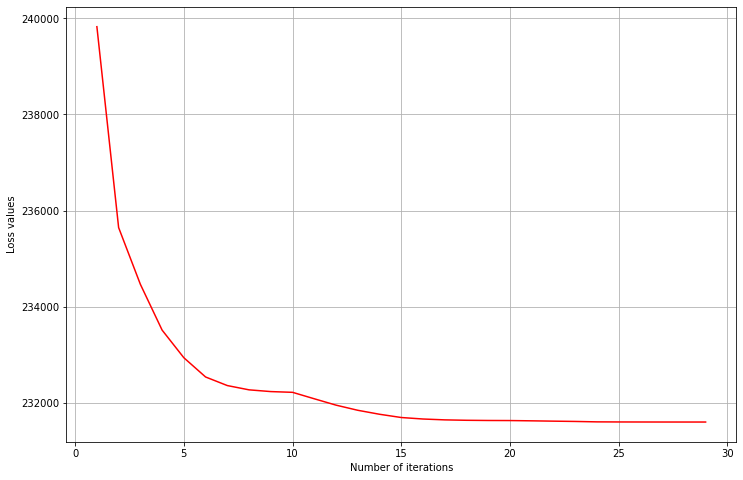

In [19]:
loss_instance.plot_loss_curve(losses)

<h3 style = "font-size:60px; font-family:Garamond ; font-weight : normal; background-color: #f6f5f5 ; color : #fe346e; text-align: center; border-radius: 100px 100px;">Question 4</h3>

In [20]:
# Splitting data into training and validation set
train_X = dataset.iloc[:4000, 1:].values
train_y = dataset.iloc[:4000, 0].values
val_X = dataset.iloc[4000:, 1:].values
val_y = dataset.iloc[4000:, 0]

### There are two methods to calculate the Optimal K
1.`Elbow Method`
2.`Silhouette score`
- Lets find optimal k using both

In [21]:
# Using Elbow Method
class ElbowMethod:
    def __init__(self, n_clusters=8):
        self.n_clusters = range(1, n_clusters)
        self.inertias = list()
    def plot_elbow_curve(self, data):
        for cluster in self.n_clusters:
            km = KMeans(n_clusters=cluster, random_state=42)
            km.fit(data)
            self.inertias.append(km.inertia_)
        plt.figure(figsize=(12, 8))
        plt.plot(self.n_clusters, self.inertias, color="red")
        plt.title("Elbow Method with Trained data")
        plt.xlabel("Number of Clusters")
        plt.ylabel("Loss values")
        plt.grid()
        plt.show()

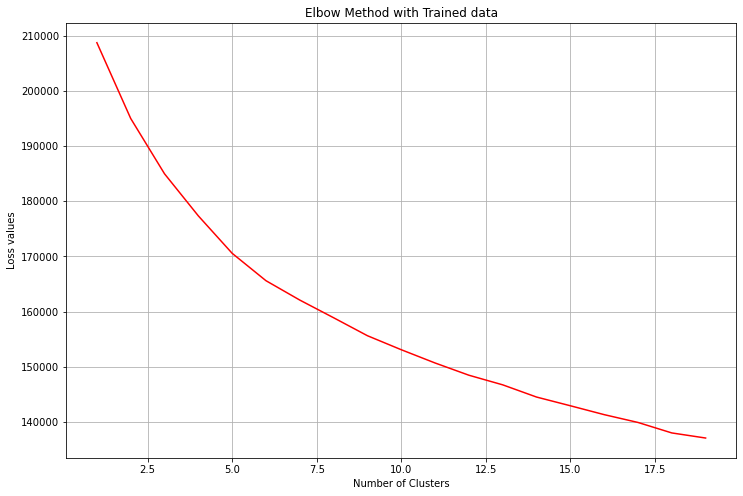

In [22]:
elbow_instance = ElbowMethod(n_clusters=20)
# plot elbow method on trained X
elbow_instance.plot_elbow_curve(train_X)

- As you can see that it is very hard to determine the number of clusters using elbow method
- lets calculate it using Silhouette score

In [23]:
# https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c
class Silhouette:
    def __init__(self, n_clusters=8):
        self.n_clusters = range(2, n_clusters, 1)
        self.train_score = list()
        self.val_score = list()
        
    def generate_scores_train_val(self, train_X, val_X):
        for cluster in self.n_clusters:
            km = KMeans(n_clusters=cluster, random_state=42)
            km.fit(train_X)
            # Silhouette score for train
            silhouette_score_train = silhouette_score(train_X, km.labels_)
            # For validation before calculating silhouette score we will need labels from predict
            val_labels = km.predict(val_X)
            silhouette_score_val = silhouette_score(val_X, val_labels)
            
            # pushing it into the train and val scores
            self.train_score.append(silhouette_score_train)
            self.val_score.append(silhouette_score_val)
    
    def plot_silhouette_curve(self):
        plt.figure(figsize=(12, 8))
        # plot for train set
        plt.plot(
            self.n_clusters, 
            self.train_score, 
            label="Silhouette Score on train set", 
            color="red"
        )
        
        # plot for validation set
        plt.plot(
            self.n_clusters, 
            self.val_score, 
            label="Silhouette Score on val set", 
            color="green"
        )
        plt.legend()
        plt.title("Finding Optimal K (number of clusters)")
        plt.xlabel("Number of Clusters")
        plt.xticks(self.n_clusters)
        plt.ylabel("Silhouette Score")
        plt.grid()
        plt.show()  
    

In [24]:
s_instance = Silhouette(n_clusters=15)
s_instance.generate_scores_train_val(train_X, val_X)

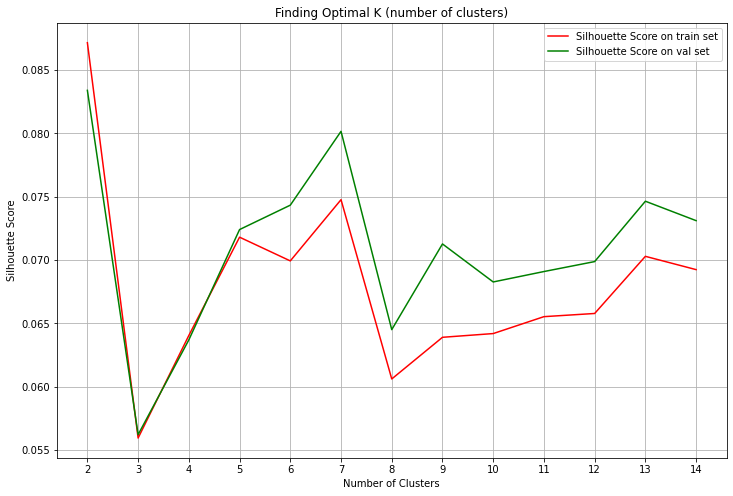

In [25]:
# plotting the Silhouette score graph
s_instance.plot_silhouette_curve()

- As you can see that optimal k (number of clusters) will be 7 which is better than some values like `5, 10`

<h3 style = "font-size:60px; font-family:Garamond ; font-weight : normal; background-color: #f6f5f5 ; color : #fe346e; text-align: center; border-radius: 100px 100px;">Question 5</h3>

In [26]:
# only 500 samples
rbf_sample_data = X[:500]

In [27]:
class KernelKMeans:
    def __init__(self, data):
        self.data = data
        self.N = data.shape[0]
        self.two_sigma_square = 0
        self.K_X = np.zeros((self.N, self.N))
        self.centroids = None
    
    # We will apply the formula given in the assignment
    def calculate_two_sigma_square(self):
        for i in range(self.N):
            for j in range(self.N):
                # find the euclidean distance, then find it for power of 2
                # calculate two sigma square according to formula mentioned in the question
                
                # for calculating euclidean distance I use the same trick as I used
                # while calculating W in assignment 1 for weight vectors
                distance = np.square(
                    np.linalg.norm(self.data[i]-self.data[j]))
                self.two_sigma_square += (1/self.N**2)*distance
    

    def calculate_k_x(self):
        # calculating the rbf kernel k using the formula mentioned in the question
        for i in range(self.N):
            for j in range(self.N):
                distance = np.square(np.linalg.norm(self.data[i]-self.data[j]))
                self.K_X[i][j] = np.exp(-distance/self.two_sigma_square)
       
    def fit(self):
        # apply the kernel transformation of X
        # first 
        self.calculate_two_sigma_square()
        self.calculate_k_x()
        
        # Now pass the converted X using rbf to KMeans with 5 clusters
        kmeans = KMeans(n_clusters=5, random_state=42)
        kmeans.fit(self.K_X)
        self.centroids = kmeans.cluster_centers_
        return self.centroids

In [28]:
kernel_kmeans_centroids = KernelKMeans(rbf_sample_data).fit()

In [29]:
print("The 5 centroid points are")
print(kernel_kmeans_centroids)

The 5 centroid points are
[[0.29770179 0.37360271 0.28268863 ... 0.2978408  0.30124538 0.29537237]
 [0.41236232 0.33441715 0.38312076 ... 0.45424514 0.49316995 0.47563303]
 [0.38957067 0.33909321 0.39516357 ... 0.43619249 0.44080497 0.40663647]
 [0.37799485 0.37162967 0.3456679  ... 0.36184216 0.56825403 0.42002415]
 [0.4017501  0.34667103 0.353355   ... 0.37778764 0.40383904 0.41355939]]


In [30]:
print("Sum of all dimensions of each of these 5 centroid points")
print(kernel_kmeans_centroids.sum(axis=1))

Sum of all dimensions of each of these 5 centroid points
[148.50786337 218.01797822 210.1178859  191.06057845 185.88921576]
